# Kaggle-Black Friday dataset

## 2019-04-11 start

## Summary

- Data is dispersion


- Mode of data is 6,855


- percentage of each age


Age | percentage
---- | --------------- |
0-17 | 2.64% |
18-25 | 17.97% |
26-35 | 39.85% |
36-45 | 20.14% |
46-50 | 8.24% |
51-55 | 7.21% |
55+ | 3.94% |


- 26-35 has more consumption than other age


- Male has more consumption than female,which accounts for 76.79 percent of purchase amount


- The correlation of features are weak


- Using pca data may better than choosing features to train models 


- Using Gradient Boosting Regressor may be better than Decision Tree Regressor

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
sns.set()

In [3]:
original=pd.read_csv('./BlackFriday.csv')

In [4]:
print(original.head())
print(original.shape)
print(original.isnull().sum())
print(original.dtypes)

   User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN      8370  
1                 6.0                14.0     15200  
2                 NaN                 NaN   

## Question definition

- What is the percentage of every age?


- Which age range is the most group of consumption?


- Male or Female has most consumption?


- With using machine learning,can we predict purchase amount?

## Data preprocessing

In [5]:
original['User_ID']=original['User_ID'].astype('str')

In [6]:
original['Product_Category_2']=original['Product_Category_2'].fillna(round(np.mean(original['Product_Category_2']),0))
original['Product_Category_3']=original['Product_Category_3'].fillna(round(np.mean(original['Product_Category_3']),0))

In [7]:
original.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [8]:
original['Product_Category_2']=original['Product_Category_2'].astype('str')
original['Product_Category_3']=original['Product_Category_3'].astype('str')

In [9]:
original.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,10.0,13.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,10.0,13.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,13.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,10.0,13.0,7969


In [10]:
original.dtypes

User_ID                       object
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category_1             int64
Product_Category_2            object
Product_Category_3            object
Purchase                       int64
dtype: object

## Describe Statistics--Purchase

Find:

- five-number summary(五數摘要)


- skewness


- kurtosis


- coefficient of variation


- mode


- range


In [11]:
original['Purchase'].describe()

count    537577.000000
mean       9333.859853
std        4981.022133
min         185.000000
25%        5866.000000
50%        8062.000000
75%       12073.000000
max       23961.000000
Name: Purchase, dtype: float64

In [12]:
def cv(data):
    x=data.std()
    y=data.mean()
    coefficientofvariation=round((x/y)*100,4)
    return coefficientofvariation

In [13]:
print('Purchase skewness:',original['Purchase'].skew())
print('Purchase kurtosis:',original['Purchase'].kurt())
print('Purchase cv:%1.2f%%'%(cv(original['Purchase'])))
print('Purchase mode:',original['Purchase'].mode())
print('Purchase range:',original['Purchase'].max()-original['Purchase'].min())

Purchase skewness: 0.6242797316083074
Purchase kurtosis: -0.34312137256836284
Purchase cv:53.37%
Purchase mode: 0    6855
dtype: int64
Purchase range: 23776


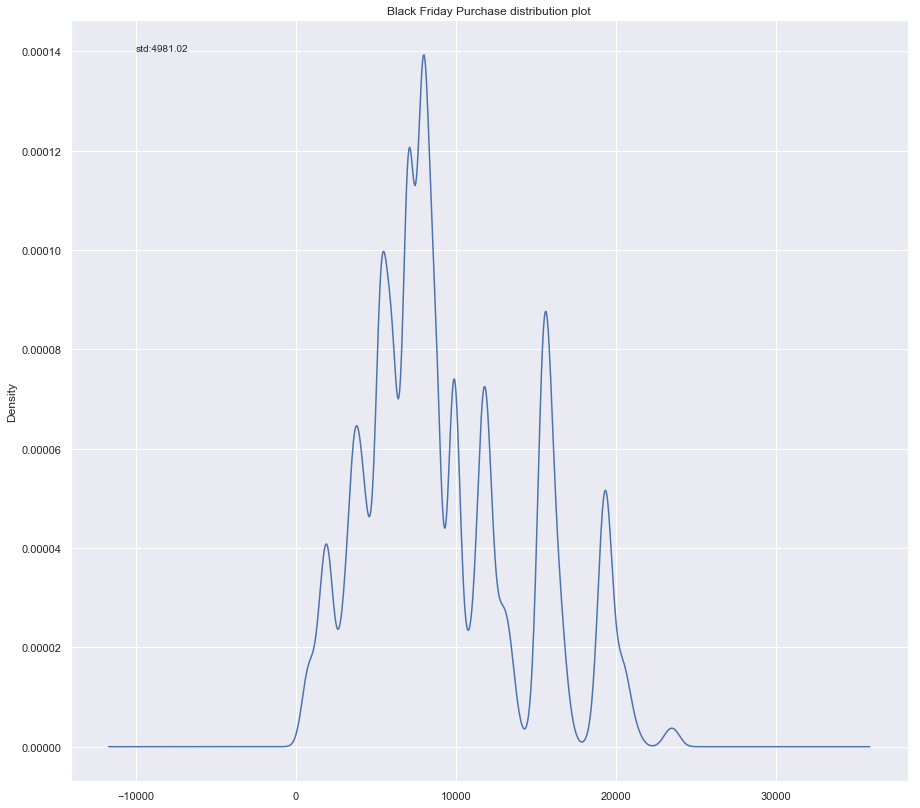

In [14]:
z1=plt.figure(figsize=(15,14))
original['Purchase'].plot(kind='kde',title='Black Friday Purchase distribution plot')
plt.text(-10000,0.00014,'std:%1.2f'%(original['Purchase'].std()))
plt.savefig('./charts/purchase_distribution_plot.png')
plt.show()

## Summary

- Standard deviation is large,coefficient of variation is 50 percent,
  
  and range of purchase is 23776,which means this data is dispersion.
  
  
- Skewness value is 0.6,which is bigger than 0,means data distribution
  
  is skewed frequency distribution,and data is possitive distribution


- Kurtosis value is -0.3,which is smaller than 0,means kurtosis is platykurtic


- Data distribution is more distributed under mean of data


- According to Central Limit Theroem,distribution is close to normal distribution

## Age

In [15]:
original.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [16]:
ageGroup=original.groupby(by='Age')
ageam=ageGroup.sum()
ageAmount=pd.DataFrame(ageam.loc[:,'Purchase'])

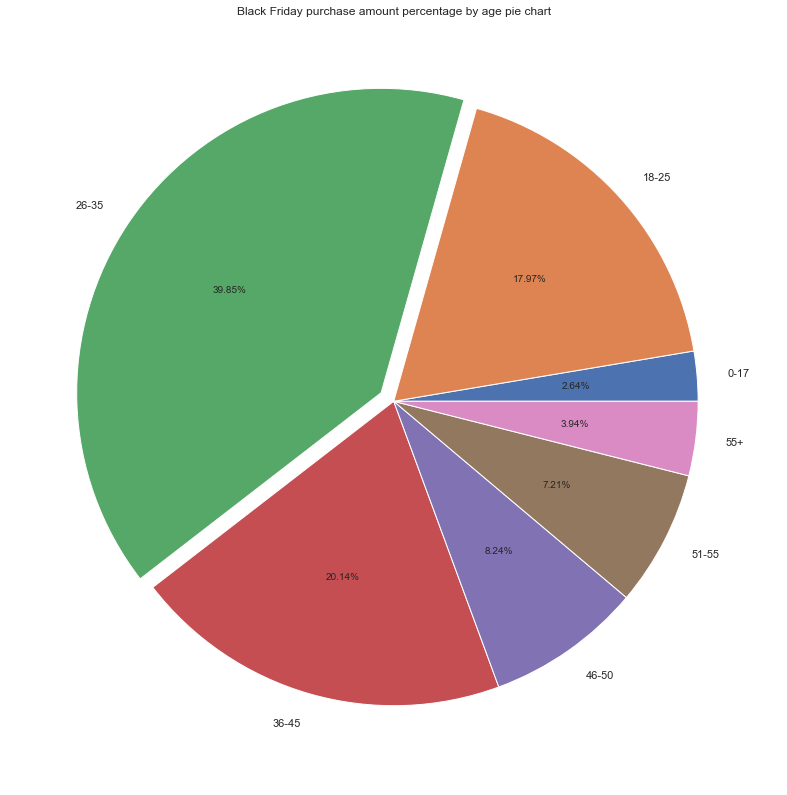

In [17]:
z2=plt.figure(figsize=(15,14))
y=np.array(ageAmount['Purchase'])
label=np.array(ageAmount.index)
explode=[0.0,0.0,0.05,0.0,0.0,0.0,0.0]
plt.pie(y,labels=label,explode=explode,autopct='%1.2f%%')
plt.title('Black Friday purchase amount percentage by age pie chart',fontsize='large')
plt.savefig('./charts/purchase_by_age_pie.png')
plt.show()

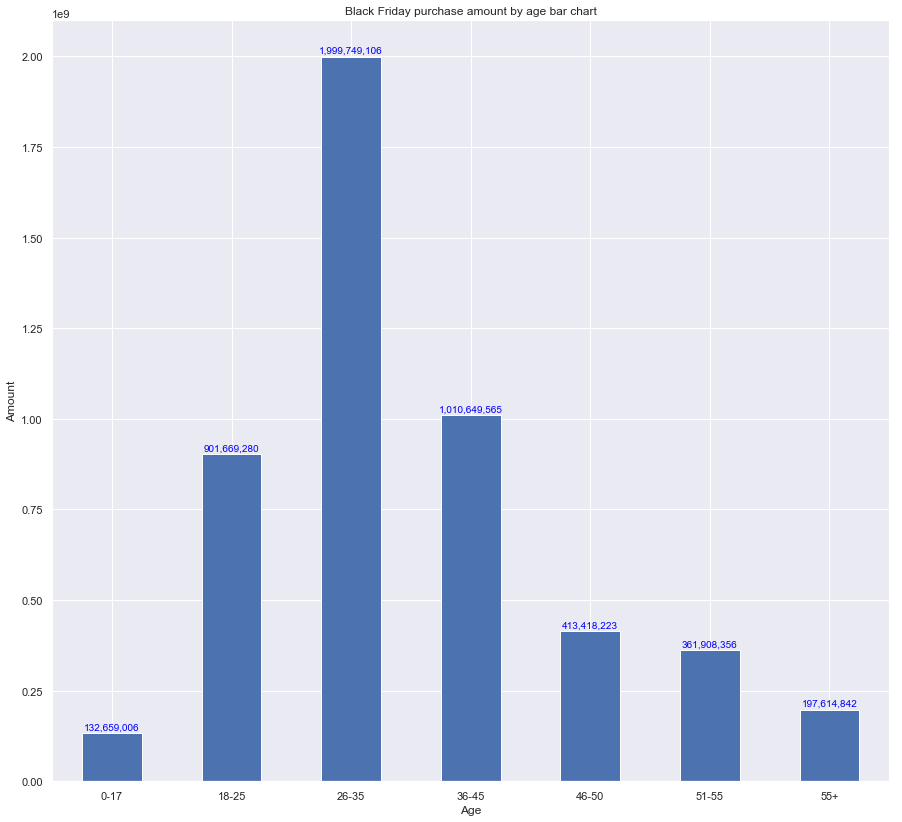

In [18]:
z3=ageAmount.plot.bar(figsize=(15,14),title='Black Friday purchase amount by age bar chart',legend=False)
z3.get_figure()
x=np.arange(ageAmount.index.shape[0])
y=np.array(ageAmount['Purchase'])
for i,j in zip(x,y):
    plt.text(i,j+10000000,format(j,','),ha='center',color='blue')
plt.xticks(range(ageAmount.index.shape[0]),ageAmount.index,rotation=0)
plt.ylabel('Amount')
plt.xlabel('Age')
plt.savefig('./charts/purchase_by_age_bar.png')
plt.show()

## Summary


- 26-35 has the highest proportion,

  which accounts for 39.85 percent of Black Friday purchase amount
  
  
- 36-45 has second higher proportion,

  which accounts for 20.14 percent of Black Friday purchase amount
  
  
- 55+ has more proportion than 0-17


- 0-17 has least proportion,

  which accounts for 2.64 percent of Black Friday purchase amout

## Gender

In [19]:
GenderGroup=original.groupby(by='Gender')
Gendersum=GenderGroup.sum()
GenderSum=pd.DataFrame(Gendersum.loc[:,'Purchase'])

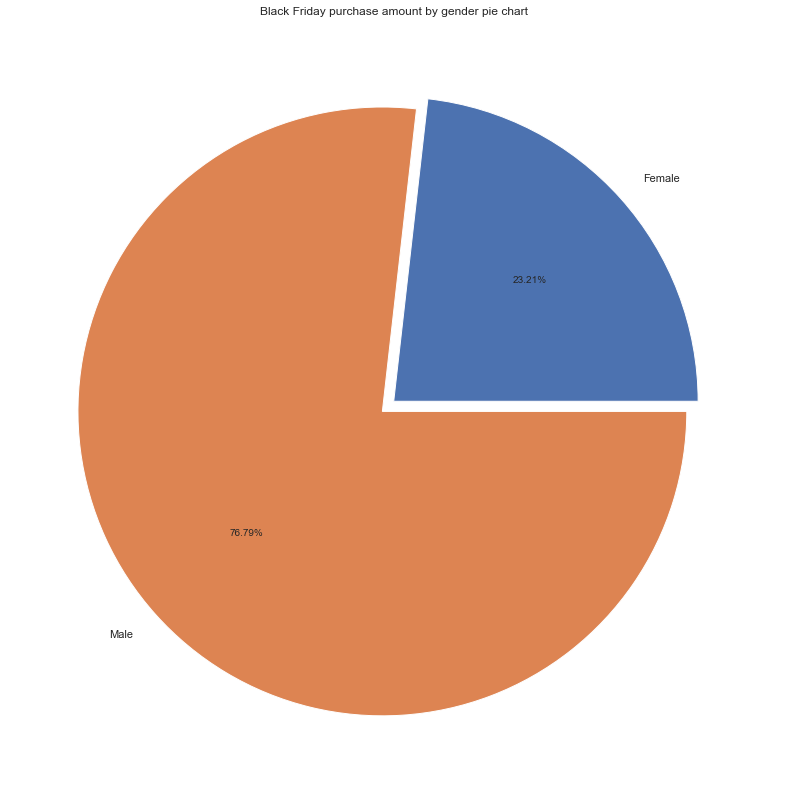

In [20]:
z4=plt.figure(figsize=(15,14))
labels=['Female','Male']
explode=[0,0.05]
y=np.array(GenderSum['Purchase'])
plt.title('Black Friday purchase amount by gender pie chart',fontsize='large')
plt.pie(y,labels=labels,explode=explode,autopct='%1.2f%%')
plt.savefig('./charts/purchase_by_gender_pie.png')
plt.show()

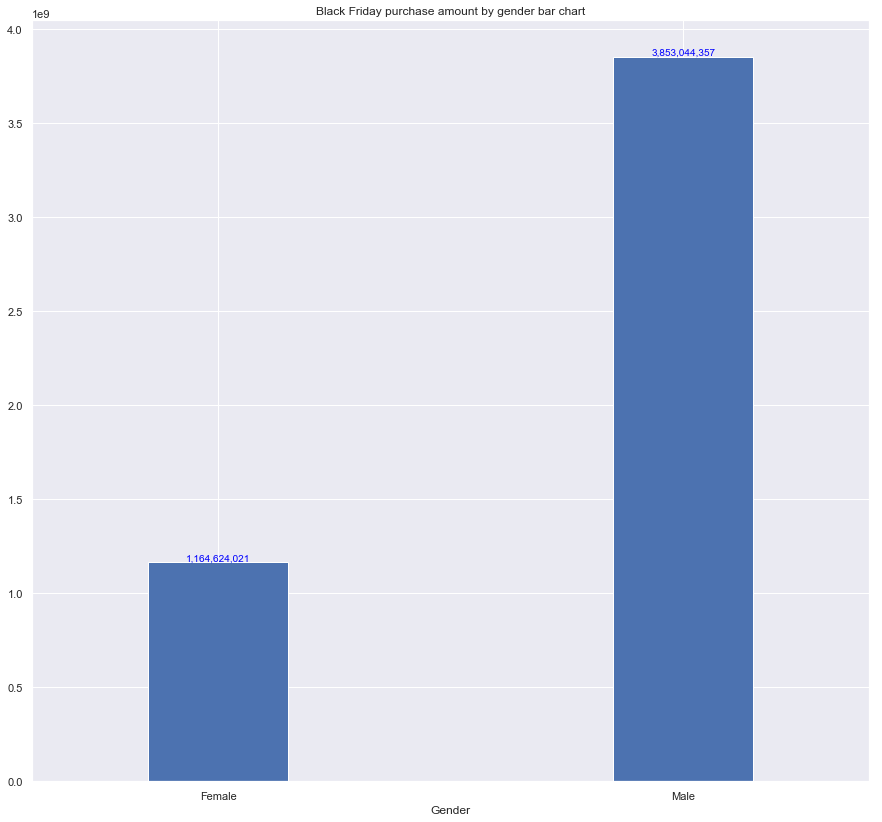

In [21]:
z5=GenderSum.plot.bar(figsize=(15,14),legend=False,width=0.3)
z5.get_figure()
plt.title('Black Friday purchase amount by gender bar chart',fontsize='large')
plt.xticks(range(2),['Female','Male'],rotation=0)
x=np.arange(GenderSum.index.shape[0])
y=np.array(GenderSum['Purchase'])
for i,j in zip(x,y):
    plt.text(i,j+10000000,format(j,','),ha='center',color='blue')
else:
    pass
plt.savefig('./charts/purchase_by_gender_bar.png')
plt.show()

## Summary

- Male's consumption is much more higher than female's


- Male accounts for 76.79 percentage of Black Friday purchase amount


- Female accounts for 23.21 percentage of Black Friday purchase amount


- The deviation of male's consumption and female's consumption is about 2.7 ten million(dollars)

## Predict

## Data Preproccesing

In [22]:
original.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,10.0,13.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,10.0,13.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,13.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,10.0,13.0,7969


In [23]:
original.dtypes

User_ID                       object
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category_1             int64
Product_Category_2            object
Product_Category_3            object
Purchase                       int64
dtype: object

In [24]:
data=original.loc[:,['Gender','Occupation','Age','City_Category','Stay_In_Current_City_Years',
                    'Marital_Status','Product_Category_1','Purchase']]
data.head()

,Gender,Occupation,Age,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,F,10,0-17,A,2,0,3,8370
1,F,10,0-17,A,2,0,1,15200
2,F,10,0-17,A,2,0,12,1422
3,F,10,0-17,A,2,0,12,1057
4,M,16,55+,C,4+,0,8,7969


In [26]:
predata=data.sample(n=10000)

In [27]:
predata.head()

,Gender,Occupation,Age,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
92789,F,3,36-45,B,2,1,8,6177
287621,F,3,36-45,B,2,1,5,8634
292467,M,6,51-55,B,1,1,1,11828
110718,M,16,36-45,C,2,1,1,19565
307772,F,17,36-45,B,3,1,1,8217


In [29]:
for i in range(predata.index.shape[0]):
    if predata.iloc[i,0]=='F':
        predata.iloc[i,0]=0
    else:
        predata.iloc[i,0]=1

In [31]:
predata['Age'].unique()

array(['36-45', '51-55', '26-35', '18-25', '46-50', '55+', '0-17'],
      dtype=object)

In [32]:
for i in range(predata.index.shape[0]):
    if predata.iloc[i,2]=='0-17':
        predata.iloc[i,2]=0
    elif predata.iloc[i,2]=='18-25':
        predata.iloc[i,2]=1
    elif predata.iloc[i,2]=='26-35':
        predata.iloc[i,2]=2
    elif predata.iloc[i,2]=='36-45':
        predata.iloc[i,2]=3
    elif predata.iloc[i,2]=='46-50':
        predata.iloc[i,2]=4
    elif predata.iloc[i,2]=='51-55':
        predata.iloc[i,2]=5
    else:
        predata.iloc[i,2]=6

In [34]:
predata['City_Category'].unique()

array(['B', 'C', 'A'], dtype=object)

In [35]:
for i in range(predata.index.shape[0]):
    if predata.iloc[i,3]=='A':
        predata.iloc[i,3]=0
    elif predata.iloc[i,3]=='B':
        predata.iloc[i,3]=1
    else:
        predata.iloc[i,3]=2

In [36]:
predata['Stay_In_Current_City_Years'].unique()

array(['2', '1', '3', '4+', '0'], dtype=object)

In [37]:
for i in range(predata.index.shape[0]):
    if predata.iloc[i,4]=='4+':
        predata.iloc[i,4]=5

In [39]:
print(predata.head())
print(predata.dtypes)

        Gender  Occupation  Age  City_Category Stay_In_Current_City_Years  \
92789        0           3    3              1                          2   
287621       0           3    3              1                          2   
292467       1           6    5              1                          1   
110718       1          16    3              2                          2   
307772       0          17    3              1                          3   

        Marital_Status  Product_Category_1  Purchase  
92789                1                   8      6177  
287621               1                   5      8634  
292467               1                   1     11828  
110718               1                   1     19565  
307772               1                   1      8217  
Gender                         int64
Occupation                     int64
Age                            int64
City_Category                  int64
Stay_In_Current_City_Years    object
Marital_Status        

In [40]:
predata['Stay_In_Current_City_Years']=predata['Stay_In_Current_City_Years'].astype('int64')

## Correlation analysis--Pearson coefficient matrix

In [42]:
pm=pd.DataFrame(predata.corr(method='pearson'))
pm.sort_values(by='Purchase',ascending=False)

,Gender,Occupation,Age,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
Purchase,0.060558,0.017502,0.026158,0.068759,0.012816,0.013979,-0.313609,1.000000
City_Category,-0.013167,0.040760,0.113984,1.000000,0.027864,0.036873,-0.026383,0.068759
Gender,1.000000,0.105297,0.004126,-0.013167,0.033495,-0.006141,-0.067609,0.060558
Age,0.004126,0.101514,1.000000,0.113984,0.016688,0.316599,0.061292,0.026158
Occupation,0.105297,1.000000,0.101514,0.040760,0.049027,0.031170,-0.002349,0.017502
Marital_Status,-0.006141,0.031170,0.316599,0.036873,-0.009491,1.000000,0.024387,0.013979
Stay_In_Current_City_Years,0.033495,0.049027,0.016688,0.027864,1.000000,-0.009491,-0.004179,0.012816
Product_Category_1,-0.067609,-0.002349,0.061292,-0.026383,-0.004179,0.024387,1.000000,-0.313609


### Summary

- The correlation coefficient is normally small


- The correlation between purchase and other features is weak


With using Pearson coefficient,finding that the correlation between every features is weak,

If use choosing features to train models,may not be very well

So choosing other method may be better,

below this,will do principal component analysis.

To find the best number of n_components,

and use pca data to train models.

## Principal Component Analysis

In [44]:
data=predata.iloc[:,0:7]
target=predata.loc[:,'Purchase']
data.head()

,Gender,Occupation,Age,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1
92789,0,3,3,1,2,1,8
287621,0,3,3,1,2,1,5
292467,1,6,5,1,1,1,1
110718,1,16,3,2,2,1,1
307772,0,17,3,1,3,1,1


In [47]:
pcamodel=PCA(n_components=7).fit(data)
print(pcamodel.explained_variance_ratio_)

[0.68747874 0.22838372 0.03910001 0.02968142 0.00899177 0.0034424
 0.00292194]


In [48]:
pcaModel=PCA(n_components=2).fit(data)
pcaData=pcaModel.transform(data)

### Summary

With using sklearn.decomposition.PCA,

and finding explained variance ratio,

find the best number of n_components is 2.

So using n_components=2 to fit the data and transform,

and using this data to train models.

## Predict--GradientBoostingRegressor

In [50]:
train_pca_data,test_pca_data, \
train_pca_target,test_pca_target = \
train_test_split(pcaData,target,train_size=0.6)

c:\users\az11438\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [84]:
pcaGBR=GradientBoostingRegressor(learning_rate=0.2).fit(train_pca_data,train_pca_target)

In [85]:
pcaGBR

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.2, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [86]:
pcaGBRpre=pcaGBR.predict(train_pca_data)
print('mean_absolute_error:%1.2f'%mean_absolute_error(train_pca_target,pcaGBRpre))
print('mean_squared_error:%1.2f'%mean_squared_error(train_pca_target,pcaGBRpre))
print('r2_score:%1.2f'%(r2_score(train_pca_target,pcaGBRpre)))

mean_absolute_error:2116.45
mean_squared_error:7636294.21
r2_score:0.69


In [87]:
pcaGBRpredict=pcaGBR.predict(test_pca_data)
print('mean_absolute_error:%1.2f'%mean_absolute_error(test_pca_target,pcaGBRpredict))
print('mean_squared_error:%1.2f'%mean_squared_error(test_pca_target,pcaGBRpredict))
print('r2_score:%1.2f'%r2_score(test_pca_target,pcaGBRpredict))

mean_absolute_error:2326.67
mean_squared_error:9406073.08
r2_score:0.62


## Predict--Decision Tree Regressor

In [139]:
pcaDTR=DecisionTreeRegressor(max_depth=7).fit(train_pca_data,train_pca_target)
pcaDTR

DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [140]:
pcaDTRpre=pcaDTR.predict(train_pca_data)
print('mean_absolute_error:%1.2f'%mean_absolute_error(train_pca_target,pcaDTRpre))
print('mean_squared_error:%1.2f'%mean_squared_error(train_pca_target,pcaDTRpre))
print('r2_score:%1.2f'%(r2_score(train_pca_target,pcaDTRpre)))

mean_absolute_error:2162.43
mean_squared_error:8190132.96
r2_score:0.67


In [141]:
pcaDTRpredict=pcaDTR.predict(test_pca_data)
print('mean_absolute_error:%1.2f'%mean_absolute_error(test_pca_target,pcaDTRpredict))
print('mean_squared_error:%1.2f'%mean_squared_error(test_pca_target,pcaDTRpredict))
print('r2_score:%1.2f'%r2_score(test_pca_target,pcaDTRpredict))

mean_absolute_error:2355.55
mean_squared_error:9740582.22
r2_score:0.61


### Summary

- Two ways:Gradient Boosting Regressor and Decision Tree Regressor



- Using Gradient Boosting Regressor with learning_rate=0.2,
  
  r2 score is well,and mean absolute error seems to be reasonable



- Using Decision Tree Regressor with max_depth=7,

  r2 socre is well,and mean absolute error seems to be reasonable



- According to r2 score,Gradient Boosting Regressor may be better than Decision Tree Regressor



- Using pca data seems to be fine